# Decision Tree Classifier

In [36]:
# Decision Tree Classifier to predict the revenue based on popularity

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Data Preprocessing

In [37]:
data =pd.read_csv("movies.csv")
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [38]:
# selecting required columns/data cleaning
dataset = data[['popularity', 'revenue']].copy()
dataset.dropna(inplace=True)

In [39]:
median_revenue = dataset['revenue'].median()
dataset.loc[:,'high_revenue']=(dataset['revenue']>median_revenue).astype(int)

In [47]:
dataset.head()

,popularity,revenue,high_revenue
0,150.437577,2787965087,1
1,139.082615,961000000,1
2,107.376788,880674609,1
3,112.312950,1084939099,1
4,43.926995,284139100,1


In [41]:
x = dataset[['popularity']]
y = dataset['high_revenue']
x_train,x_test,y_train,y_test=train_test_split(x ,y, test_size=0.2,random_state=42)

In [42]:
#Train the model
tree_clf=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
y_pred =tree_clf.predict(x_test)

In [45]:
# Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
cl_rep= classification_report(y_test,y_pred)

In [46]:
print("Accuracy: ",accuracy)
print("Confusion matrix:\n ",con_mat)
print("Classification Report:\n ",cl_rep)

Accuracy:  0.8251821019771072
Confusion matrix:
  [[399  92]
 [ 76 394]]
Classification Report:
                precision    recall  f1-score   support

           0       0.84      0.81      0.83       491
           1       0.81      0.84      0.82       470

    accuracy                           0.83       961
   macro avg       0.83      0.83      0.83       961
weighted avg       0.83      0.83      0.83       961



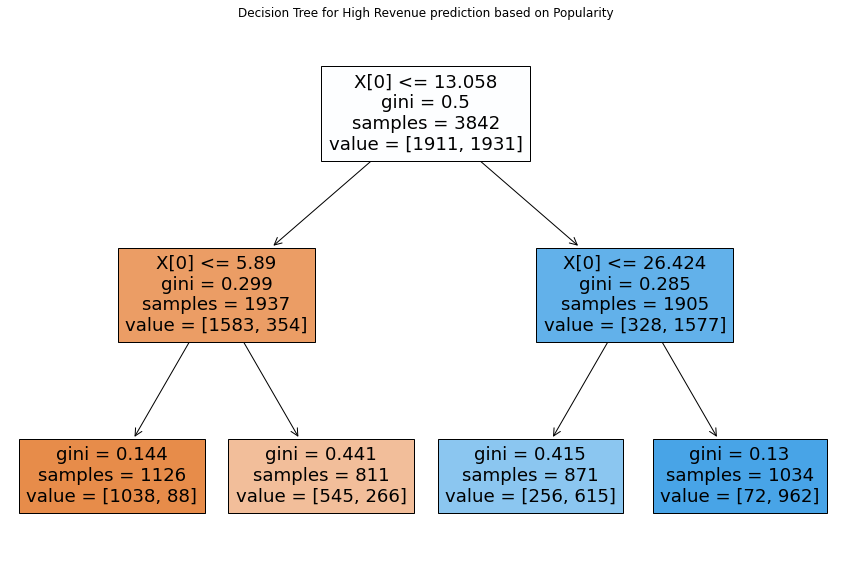

In [48]:
# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf,filled=True)
plt.title("Decision Tree for High Revenue prediction based on Popularity")
plt.show()